<a href="https://colab.research.google.com/github/Bangkit-C22-PS353-Capstone-Project/Bangkit-C22-PS353-MachineLearning/blob/main/Price_Prediction_ML_Basic_Statistical_Naive_Forecasting_(Not_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARE THE TOOLS

In [ ]:
!pip install tensorflow==2.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import that smooth library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import csv

import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# prepare the dataset, 
# download data from google drive
# https://drive.google.com/file/d/1kGgh31KDKdldPounyj1Z5vlnTE-HHctT/view?usp=sharing

!gdown --id 1kGgh31KDKdldPounyj1Z5vlnTE-HHctT

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1kGgh31KDKdldPounyj1Z5vlnTE-HHctT
To: /content/Beras Kualitas Bawah II (kg) 2019-2022.xlsx - Final (2).csv
100% 16.3k/16.3k [00:00<00:00, 21.9MB/s]


# PREPROCESS THE DATASET

In [ ]:
# read the dataset and convert into csv
dataset = pd.read_csv('Beras Kualitas Bawah II (kg) 2019-2022.xlsx - Final (2).csv')
# show me that csv
print(dataset)

     Unnamed: 0        Date  Price
0             0  2019-03-01   8800
1             1  2019-03-04   8800
2             2  2019-03-05   8900
3             3  2019-03-06   8900
4             4  2019-03-08   8900
..          ...         ...    ...
778         778  2022-04-29   8300
779         779  2022-05-04   8300
780         780  2022-05-05   8350
781         781  2022-05-06   8300
782         782  2022-05-09   8550

[783 rows x 3 columns]


In [ ]:
# see the result
print(dataset)

     Unnamed: 0        Date  Price
0             0  2019-03-01   8800
1             1  2019-03-04   8800
2             2  2019-03-05   8900
3             3  2019-03-06   8900
4             4  2019-03-08   8900
..          ...         ...    ...
778         778  2022-04-29   8300
779         779  2022-05-04   8300
780         780  2022-05-05   8350
781         781  2022-05-06   8300
782         782  2022-05-09   8550

[783 rows x 3 columns]


In [ ]:
# checking the datatypes
print(dataset.dtypes)

Unnamed: 0     int64
Date          object
Price          int64
dtype: object


# VISUALIZE THE DATASET

In [ ]:
# put x and y axis respectively
fig = px.line(dataset, x='Date', y='Price')

# this code is to add the range slider so we can see better
fig.update_xaxes(rangeslider_visible=True)

# for showing the plot
fig.show()

In [ ]:
# this is just a thought, kita bisa lihat seasonality (patterns repeat at predictable intervals)
# sekitar tanggal 5-11 each month harga mengalami kenaikan.
# sekitar tanggal 21-24 each month harga mengalami penurunan.

# MAKE THE MODEL

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
split_time = 500
time_train = dataset.Date[:split_time]
x_train = dataset.Price[:split_time]
time_valid = dataset.Date[split_time:]
x_valid = dataset.Price[split_time:]

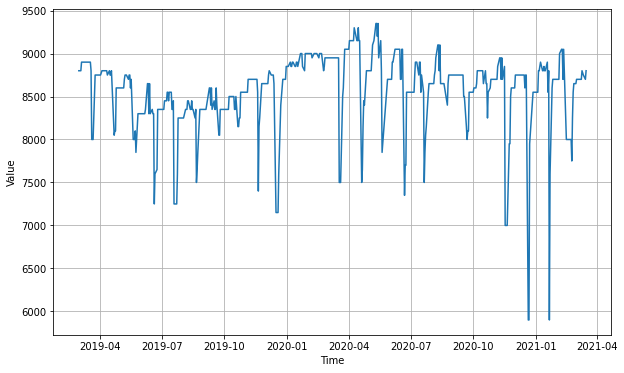

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

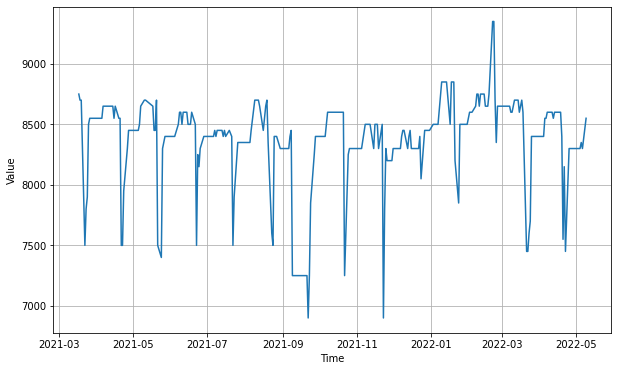

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

# Basic Statistical Naive Forecasting (Not ML)


In [ ]:
# Generate the naive forecast
naive_forecast = dataset.Price[split_time - 1:-1]

# Define time step
time_step = 500

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 500: 8750
prediction at time step 501: 8700


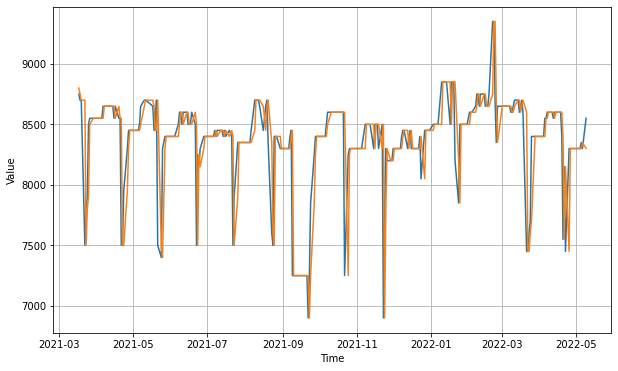

In [ ]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

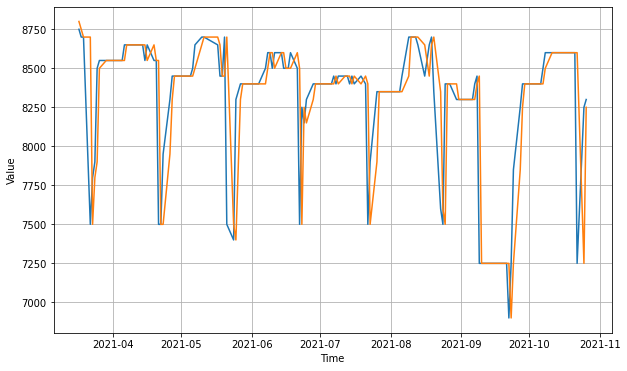

In [ ]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

93047
137
